In [ ]:
//@version=5
indicator("4:00 UTC Box with Midline (3min/5min)", overlay=true)

/// Adjustable Target Time Setting
targetHour = input.int(0, title="Target Hour (UTC)", minval=0, maxval=23)
targetMinute = input.int(0, title="Target Minute (UTC)", minval=0, maxval=59)

// Timeframe detection
iiis3min = timeframe.period == "3"
iiis5min = timeframe.period == "5"
showIndicator = iiis3min or iiis5min

// Extension length based on timeframe
boxLength = iiis3min ? 379 : iiis5min ? 228 : na

// Detect target time candle
isTargetTime = (hour == targetHour) and (minute == targetMinute)

// Get UTC date
getUTCDate(t) =>
    year(t) * 10000 + month(t) * 100 + dayofmonth(t)

currentDate = getUTCDate(time)
todayDate = getUTCDate(timenow)
isToday = currentDate == todayDate

// Persistent variables
var float boxHigh = na
var float boxLow = na
var float boxMid = na
var int   barStart = na
var box   myBox = na
var line  midLine = na

// Draw only previous day's box at today's target time (8:00), skip drawing if it's today's box
if showIndicator and isTargetTime and not isToday
    boxHigh := high
    boxLow := low
    boxMid := (high + low) / 2
    barStart := bar_index
    myBox := box.new(left=barStart, top=boxHigh, right=barStart + boxLength, bottom=boxLow, border_color=color.orange, bgcolor=color.new(color.orange, 85))
    midLine := line.new(x1=barStart, y1=boxMid, x2=barStart + boxLength, y2=boxMid, color=color.rgb(0, 0, 0, 90), style=line.style_solid)

// Remove after extension length
if not na(barStart) and bar_index > barStart + boxLength
    myBox := na
    midLine := na


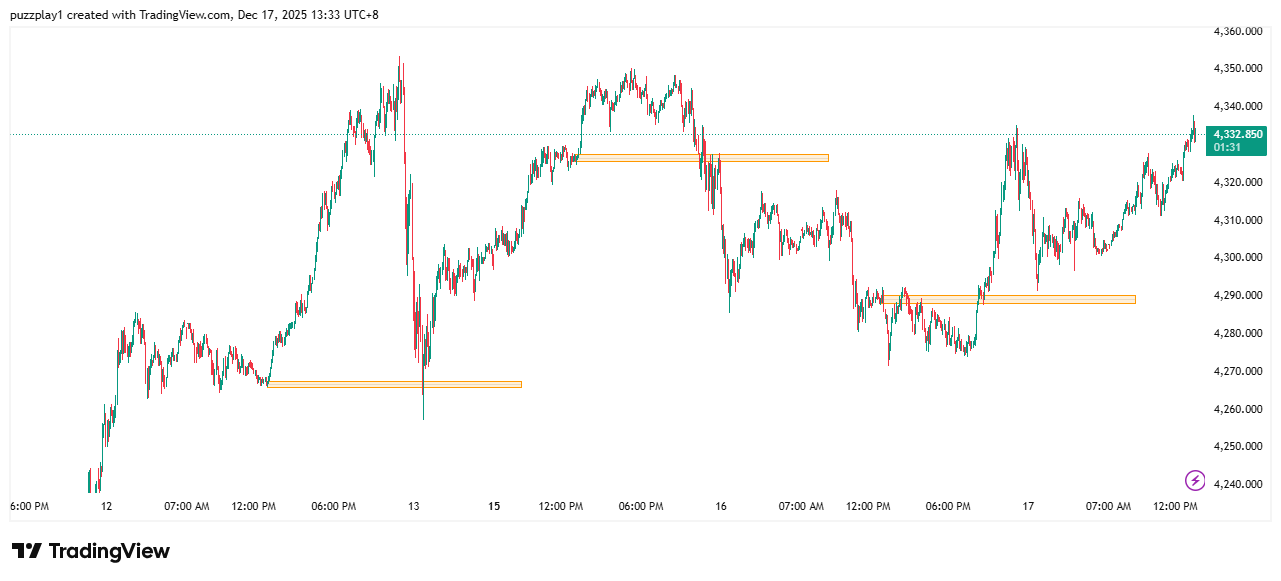